# Flight Passenger Satisfaction Analysis

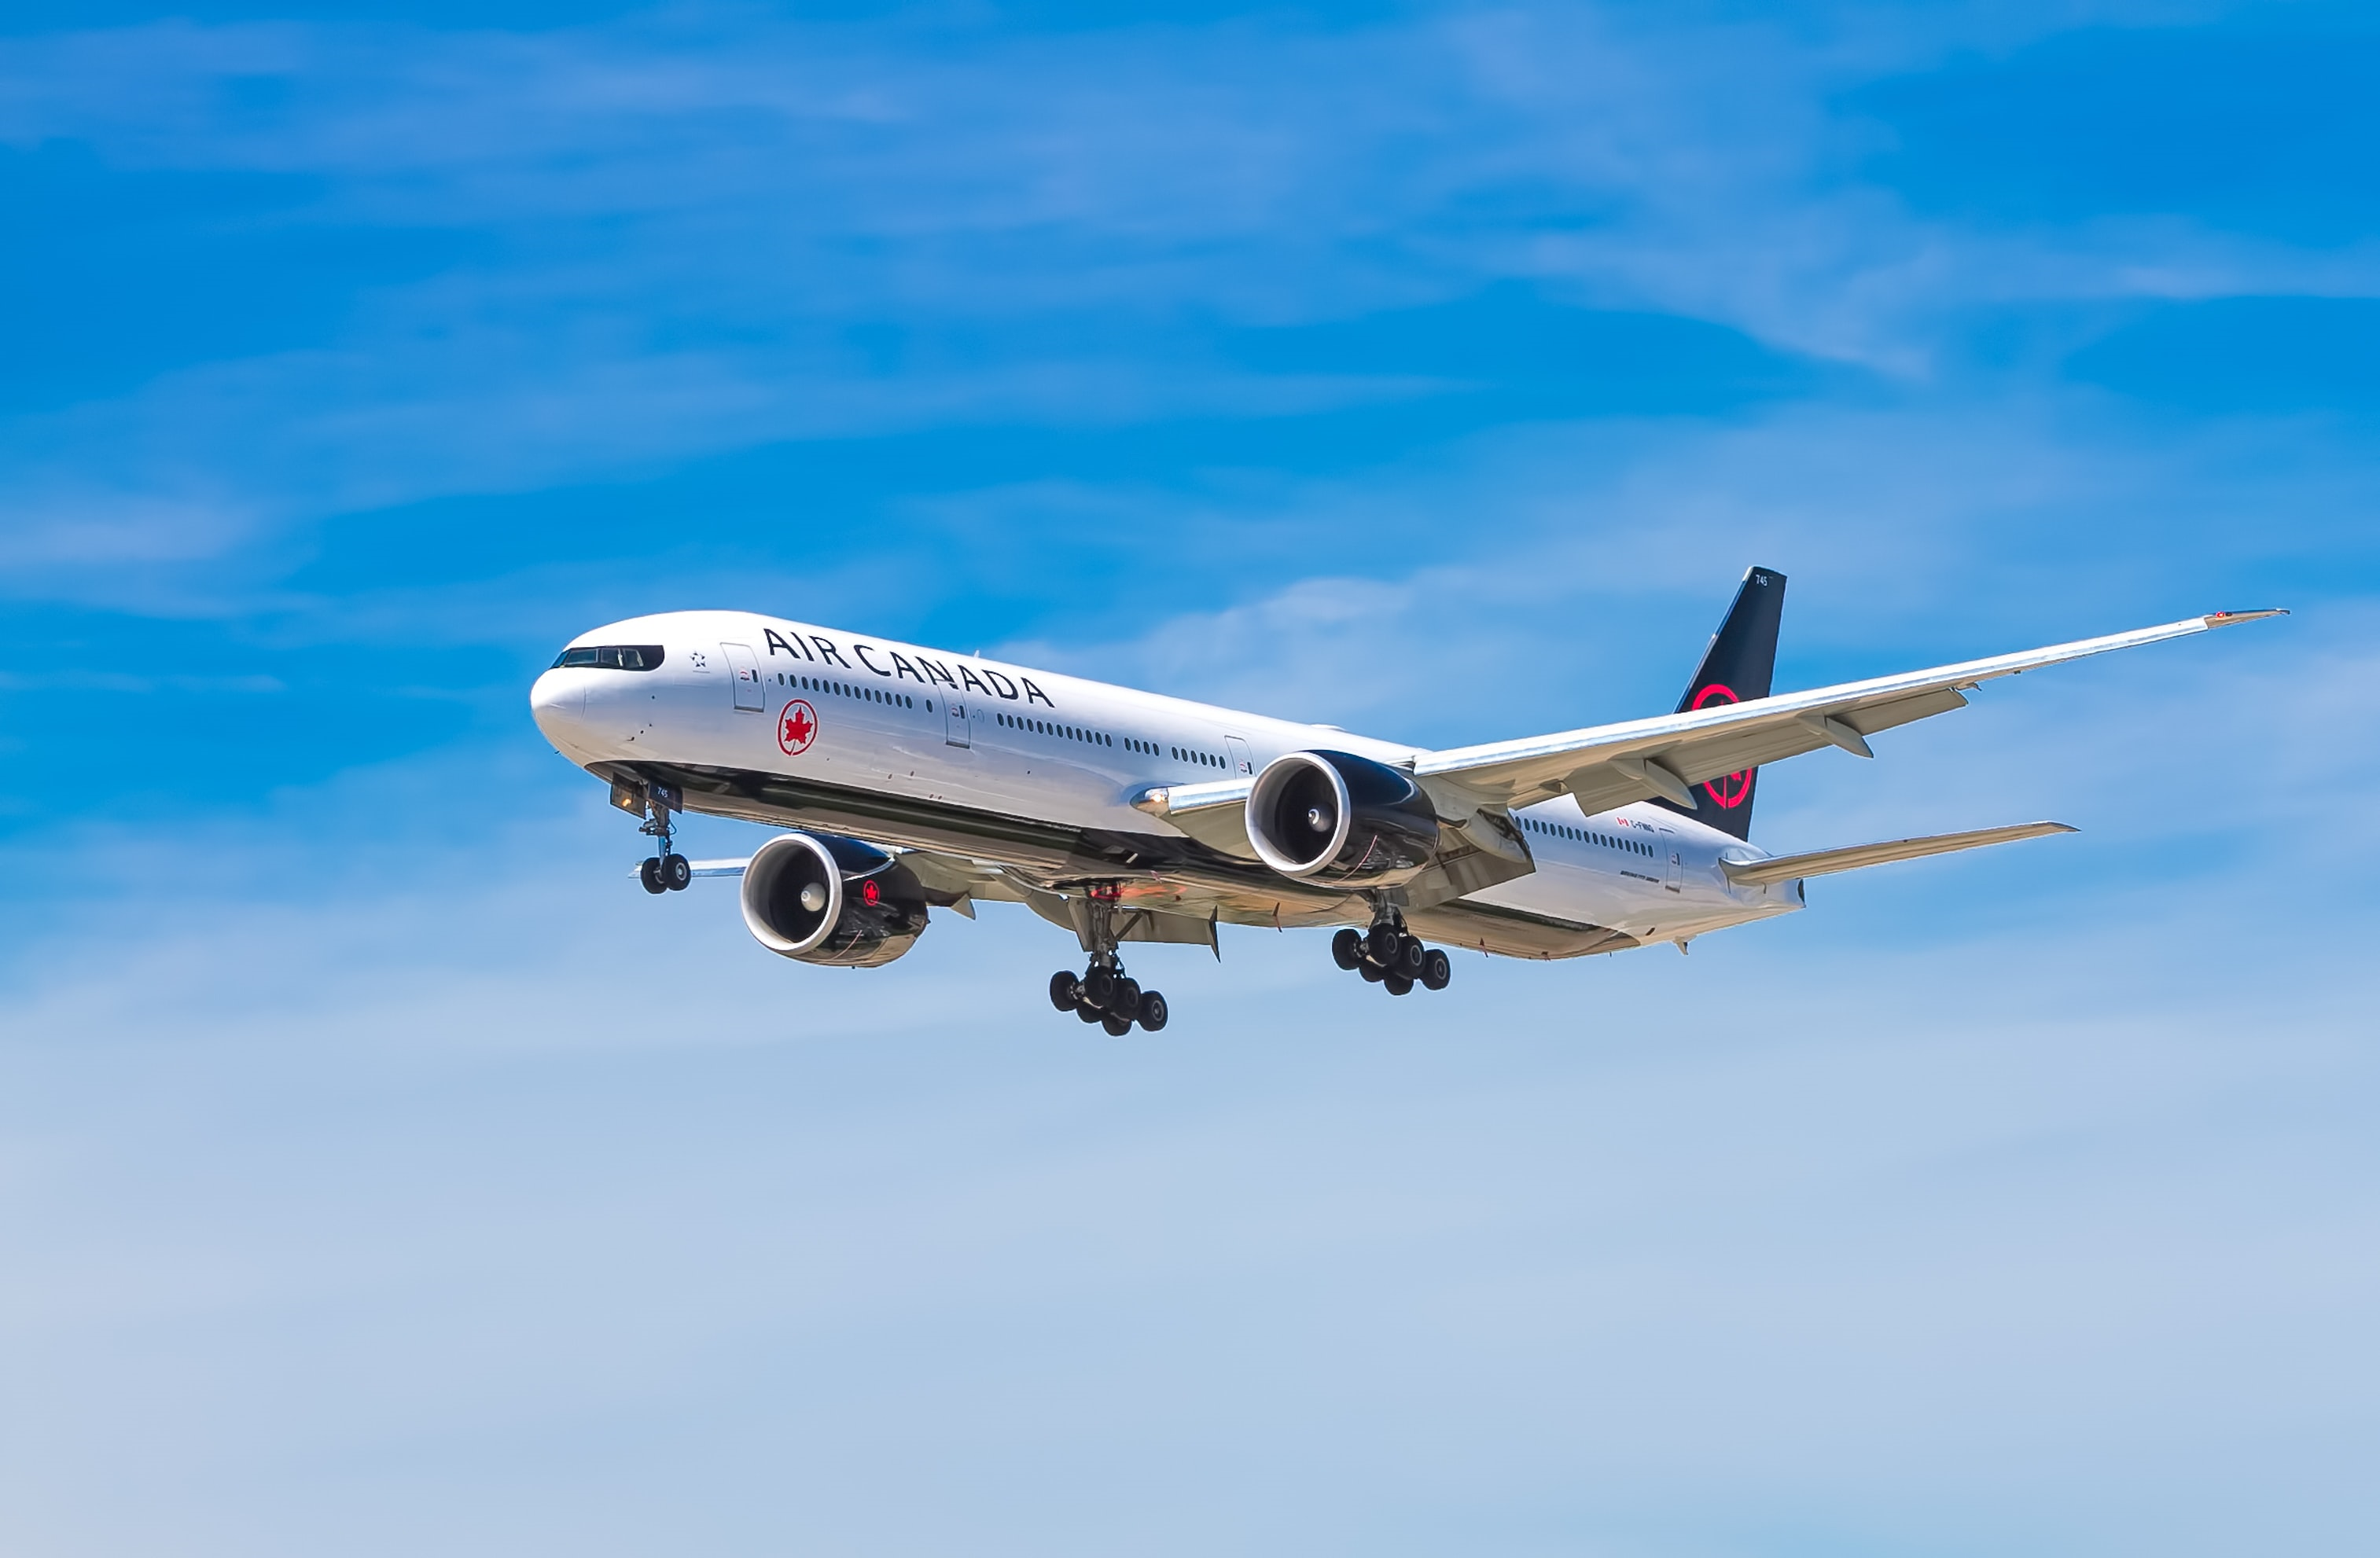

# Introduction
<br>
* We will guess whether the passengers are satisfied with the trip <br>
* We will try to use this data to create a model which tries predict if passenger is satisfied or not <br>
* We will use various machine learning algorithms in our model. <br>

In [1]:
#Loading All Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

# Load Data

In [2]:
train_df = pd.read_csv("C:/Users/adity/Downloads/Flight Passenger/train.csv")
test_df = pd.read_csv("C:/Users/adity/Downloads/Flight Passenger/test.csv")

In [3]:
print(train_df.shape,test_df.shape)

(103904, 25) (25976, 25)


In [4]:
train_df.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [5]:
train_df.drop(labels=["Unnamed: 0"],axis=1,inplace=True)
test_df.drop(labels=["Unnamed: 0"],axis=1,inplace=True)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

![](http://)* int64(18): id, Age,Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness and Departure Delay in Minutes.
* object(5): Gender, Customer Type, Type of Travel, Class and satisfaction.
* float64(1): Arrival Delay in Minutes.

<a id = "2"></a><br>
# Variable Description
1. id : Unique id number to each passenger.
2. Gender: Gender of the passengers (Female, Male)
3. Customer Type: The customer type (Loyal customer, disloyal customer)
4. Age: The actual age of the passengers
5. Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
6. Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
7. Flight distance: The flight distance of this journey
8. Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
9. Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
10. Ease of Online booking: Satisfaction level of online booking
11. Gate location: Satisfaction level of Gate location
12. Food and drink: Satisfaction level of Food and drink
13. Online boarding: Satisfaction level of online boarding
14. Seat comfort: Satisfaction level of Seat comfort
15. Inflight entertainment: Satisfaction level of inflight entertainment
16. On-board service: Satisfaction level of On-board service
17. Leg room service: Satisfaction level of Leg room service
18. Baggage handling: Satisfaction level of baggage handling
19. Check-in service: Satisfaction level of Check-in service
20. Inflight service: Satisfaction level of inflight service
21. Cleanliness: Satisfaction level of Cleanliness
22. Departure Delay in Minutes: Minutes delayed when departure
23. Arrival Delay in Minutes: Minutes delayed when Arrival
24. Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [7]:
final_df= pd.concat([train_df,test_df],axis=0).reset_index(drop=True)

In [8]:
final_df.head()

id  Gender      Customer Type  Age   Type of Travel     Class  \
0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1    5047    Male  disloyal Customer   25  Business travel  Business   
2  110028  Female     Loyal Customer   26  Business travel  Business   
3   24026  Female     Loyal Customer   25  Business travel  Business   
4  119299    Male     Loyal Customer   61  Business travel  Business   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0                       3  ...                       5                 4   
1                       3  ...                       1                 1   
2                       2  ...                       5                 4   
3                       5  ...                       2                 2   
4                       3  ...                       3                 3   

   Leg room service  Baggage handling  Checkin service  Inflight service  \
0                 3                 4                4                 5   
1                 5                 3                1                 4   
2                 3                 4                4                 4   
3                 5                 3                1                 4   
4                 4                 4                3                 3   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0            5                          25                      18.0   
1            1                           1                       6.0   
2            5                           0                       0.0   
3            2                          11                       9.0   
4            3                           0                       0.0   

              satisfaction  
0  neutral or dissatisfied  
1  neutral or dissatisfied  
2                satisfied  
3  neutral or dissatisfied  
4                satisfied  

[5 rows x 24 columns]

In [9]:
final_df.shape

(129880, 24)

#  **DATA MINING**

**Missing Value**
* Find Missing Value
* Fill Missing Value

In [10]:
final_df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

## Fill Missing Value
* Arrival_Delay_in_Minutes has 393 missing value
* Since I do not know the flight delay time, I will try a different method.
* I will fill the nan values with the average flight delay time. Because I don't want my model to be affected by this parameter.


In [11]:
final_df['Arrival Delay in Minutes'] = final_df['Arrival Delay in Minutes'].fillna(final_df['Arrival Delay in Minutes'].mean())

# **DATA CLEANSING**

* Variable Transformation <br>
* Convert categorical variables by replace function so that they can be used by the models.<br>

In [12]:
final_df.select_dtypes(include='object')

Gender      Customer Type   Type of Travel     Class  \
0         Male     Loyal Customer  Personal Travel  Eco Plus   
1         Male  disloyal Customer  Business travel  Business   
2       Female     Loyal Customer  Business travel  Business   
3       Female     Loyal Customer  Business travel  Business   
4         Male     Loyal Customer  Business travel  Business   
...        ...                ...              ...       ...   
129875    Male  disloyal Customer  Business travel  Business   
129876    Male     Loyal Customer  Business travel  Business   
129877  Female     Loyal Customer  Personal Travel       Eco   
129878    Male     Loyal Customer  Business travel  Business   
129879  Female     Loyal Customer  Personal Travel       Eco   

                   satisfaction  
0       neutral or dissatisfied  
1       neutral or dissatisfied  
2                     satisfied  
3       neutral or dissatisfied  
4                     satisfied  
...                         ...  
129875  neutral or dissatisfied  
129876                satisfied  
129877  neutral or dissatisfied  
129878                satisfied  
129879  neutral or dissatisfied  

[129880 rows x 5 columns]

In [13]:
category2=["Gender", "Customer Type", "Type of Travel", "Class", "satisfaction"]
for c in category2:
    print("{} \n".format(final_df[c].value_counts()))

Female    65899
Male      63981
Name: Gender, dtype: int64 

Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64 

Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64 

Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64 

neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64 



In [14]:
final_df.Gender.replace({'Female':1, 'Male':0}, inplace=True)
final_df['Customer Type'].replace({'Loyal Customer':1, 'disloyal Customer':0}, inplace=True)
final_df['Type of Travel'].replace({'Business travel':1, 'Personal Travel':0}, inplace=True)
final_df['Class'].replace({'Eco Plus':0, 'Eco':1,'Business':2}, inplace=True)
final_df['satisfaction'].replace({'neutral or dissatisfied':0, 'satisfied':1}, inplace=True)

In [15]:
final_df.head()

id  Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0   70172       0              1   13               0      0              460   
1    5047       0              0   25               1      2              235   
2  110028       1              1   26               1      2             1142   
3   24026       1              1   25               1      2              562   
4  119299       0              1   61               1      2              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0                       3  ...                       5                 4   
1                       3  ...                       1                 1   
2                       2  ...                       5                 4   
3                       5  ...                       2                 2   
4                       3  ...                       3                 3   

   Leg room service  Baggage handling  Checkin service  Inflight service  \
0                 3                 4                4                 5   
1                 5                 3                1                 4   
2                 3                 4                4                 4   
3                 5                 3                1                 4   
4                 4                 4                3                 3   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0            5                          25                      18.0   
1            1                           1                       6.0   
2            5                           0                       0.0   
3            2                          11                       9.0   
4            3                           0                       0.0   

   satisfaction  
0             0  
1             0  
2             1  
3             0  
4             1  

[5 rows x 24 columns]

## Exploratory Data Analysis

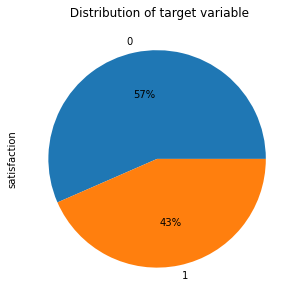

In [16]:
plt.figure(figsize=(5,5))
plt.title(' Distribution of target variable')
final_df['satisfaction'].value_counts().plot(kind = 'pie',autopct = '%1.0f%%')
plt.savefig('Distributionoftargetvariable.png')
plt.show()

## Gender-->Satisfaction

<AxesSubplot:xlabel='Gender', ylabel='count'>

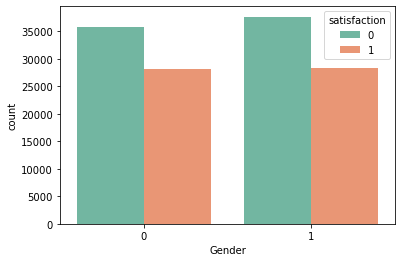

In [17]:
sns.countplot(x= 'Gender', hue='satisfaction',data = final_df, palette= "Set2")

* Females and males are satisfaction probability almost equal. Male %44, Female %43 satisfaction.


## Age-->Satisfaction

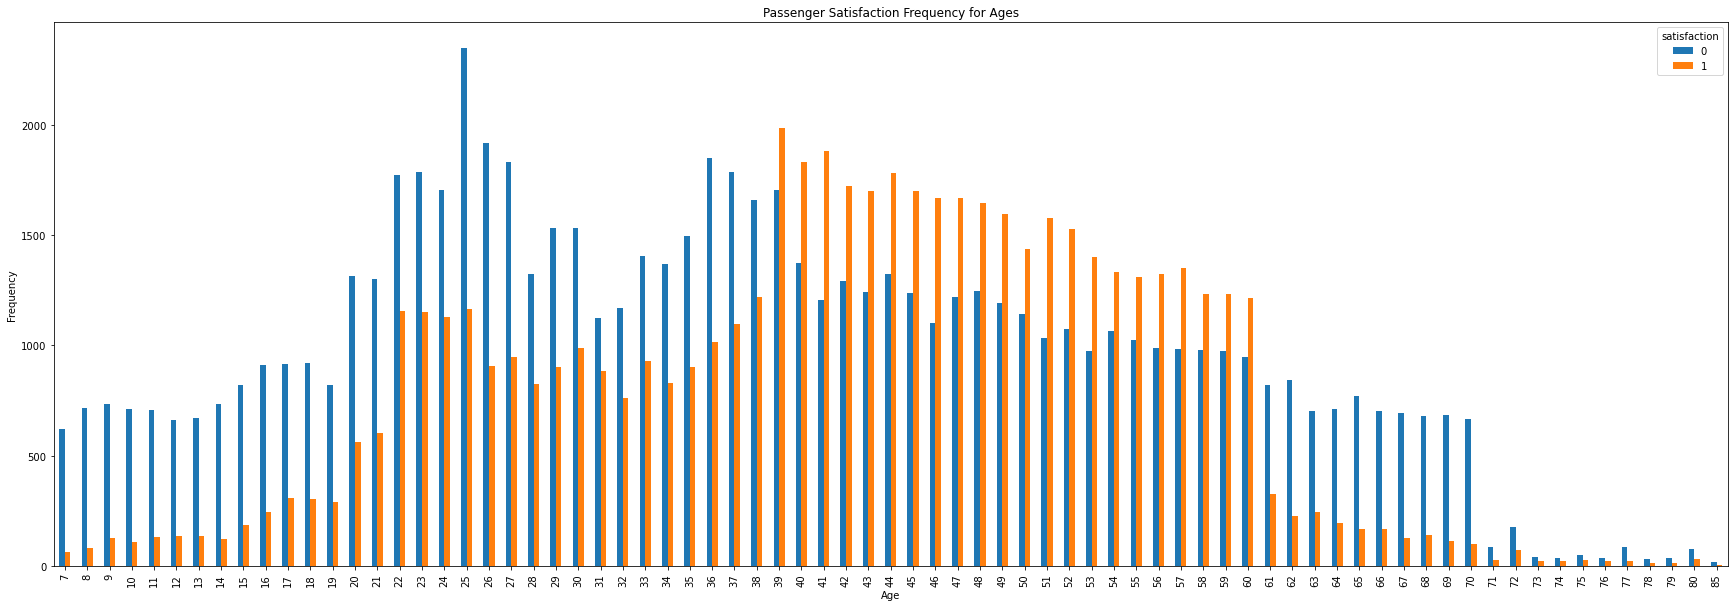

In [18]:
pd.crosstab(final_df.Age,final_df.satisfaction).plot(kind="bar",figsize=(30,10))
plt.title('Passenger Satisfaction Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('passengersatisfactionAndAges.png')
plt.show()

intervals = (0,10,20,35,60,85)
categories = ['Baby','Child','Teen','Adult','Old']
#colors=('lightgreen','lightred')

titanic['age_seg'] = pd.cut(titanic.age, intervals,labels =categories)

sns.countplot(x='age_seg',data=titanic, hue='survived' ,palette = 'Set2

* 0-30 years old is  generally neutral or dissatisfied with the flight.
* 30-60 years old is generally satisfied with the flight.
* 65-85 years old passengers is neutral or dissatisfied.

## Class-->Satisfaction

<AxesSubplot:xlabel='Class', ylabel='count'>

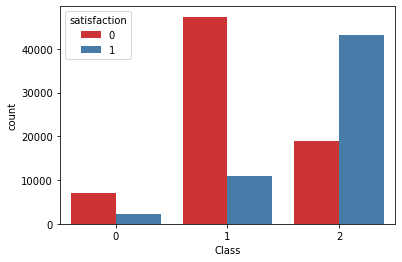

In [19]:
sns.countplot(x= 'Class', hue='satisfaction',data = final_df, palette= "Set1")

* Business class is also happy here. But eco and eco plus  neutral or dissatisfied with the flight. 

## Customer Type-->Satisfaction

<AxesSubplot:xlabel='Customer Type', ylabel='count'>

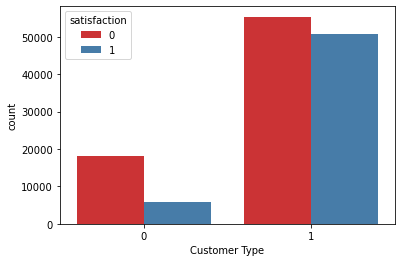

In [20]:
sns.countplot(x= 'Customer Type', hue='satisfaction',data = final_df, palette= "Set1")

* Disloyal customer is generally neutral or dissatisfied with the flight.

## Type of Travel-->Satisfaction

<AxesSubplot:xlabel='Type of Travel', ylabel='count'>

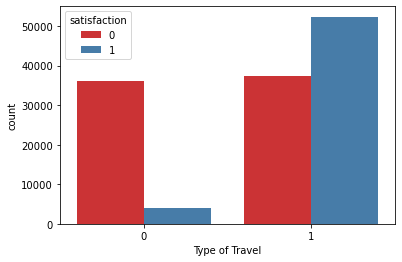

In [21]:
sns.countplot(x= 'Type of Travel', hue='satisfaction',data = final_df, palette= "Set1")

* Business travel is generally satisfied with the flight but personal travel is generally neutral or dissatisfied with the flight.
* Personal travel is %90 neutral or dissatisfied with the flight. This statistic is interesting.

# Personal Travel Analysis
* Personal travel is generally neutral or dissatisfied with the flight.
* Let's examine why.

In [22]:
personal=final_df[final_df['Type of Travel']==0] 
personal.head()

id  Gender  Customer Type  Age  Type of Travel  Class  \
0    70172       0              1   13               0      0   
5   111157       1              1   26               0      1   
6    82113       0              1   47               0      1   
11   51412       1              1   12               0      0   
13   83502       0              1   33               0      1   

    Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0               460                      3                                  4   
5              1180                      3                                  4   
6              1276                      2                                  4   
11              308                      2                                  4   
13              946                      4                                  2   

    Ease of Online booking  ...  Inflight entertainment  On-board service  \
0                        3  ...                       5                 4   
5                        2  ...                       1                 3   
6                        2  ...                       2                 3   
11                       2  ...                       1                 1   
13                       4  ...                       4                 4   

    Leg room service  Baggage handling  Checkin service  Inflight service  \
0                  3                 4                4                 5   
5                  4                 4                4                 4   
6                  3                 4                3                 5   
11                 2                 5                5                 5   
13                 5                 2                2                 2   

    Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0             5                          25                      18.0   
5             1                           0                       0.0   
6             2                           9                      23.0   
11            1                           0                       0.0   
13            4                           0                       0.0   

    satisfaction  
0              0  
5              0  
6              0  
11             0  
13             1  

[5 rows x 24 columns]

# Correlation plot

<AxesSubplot:>

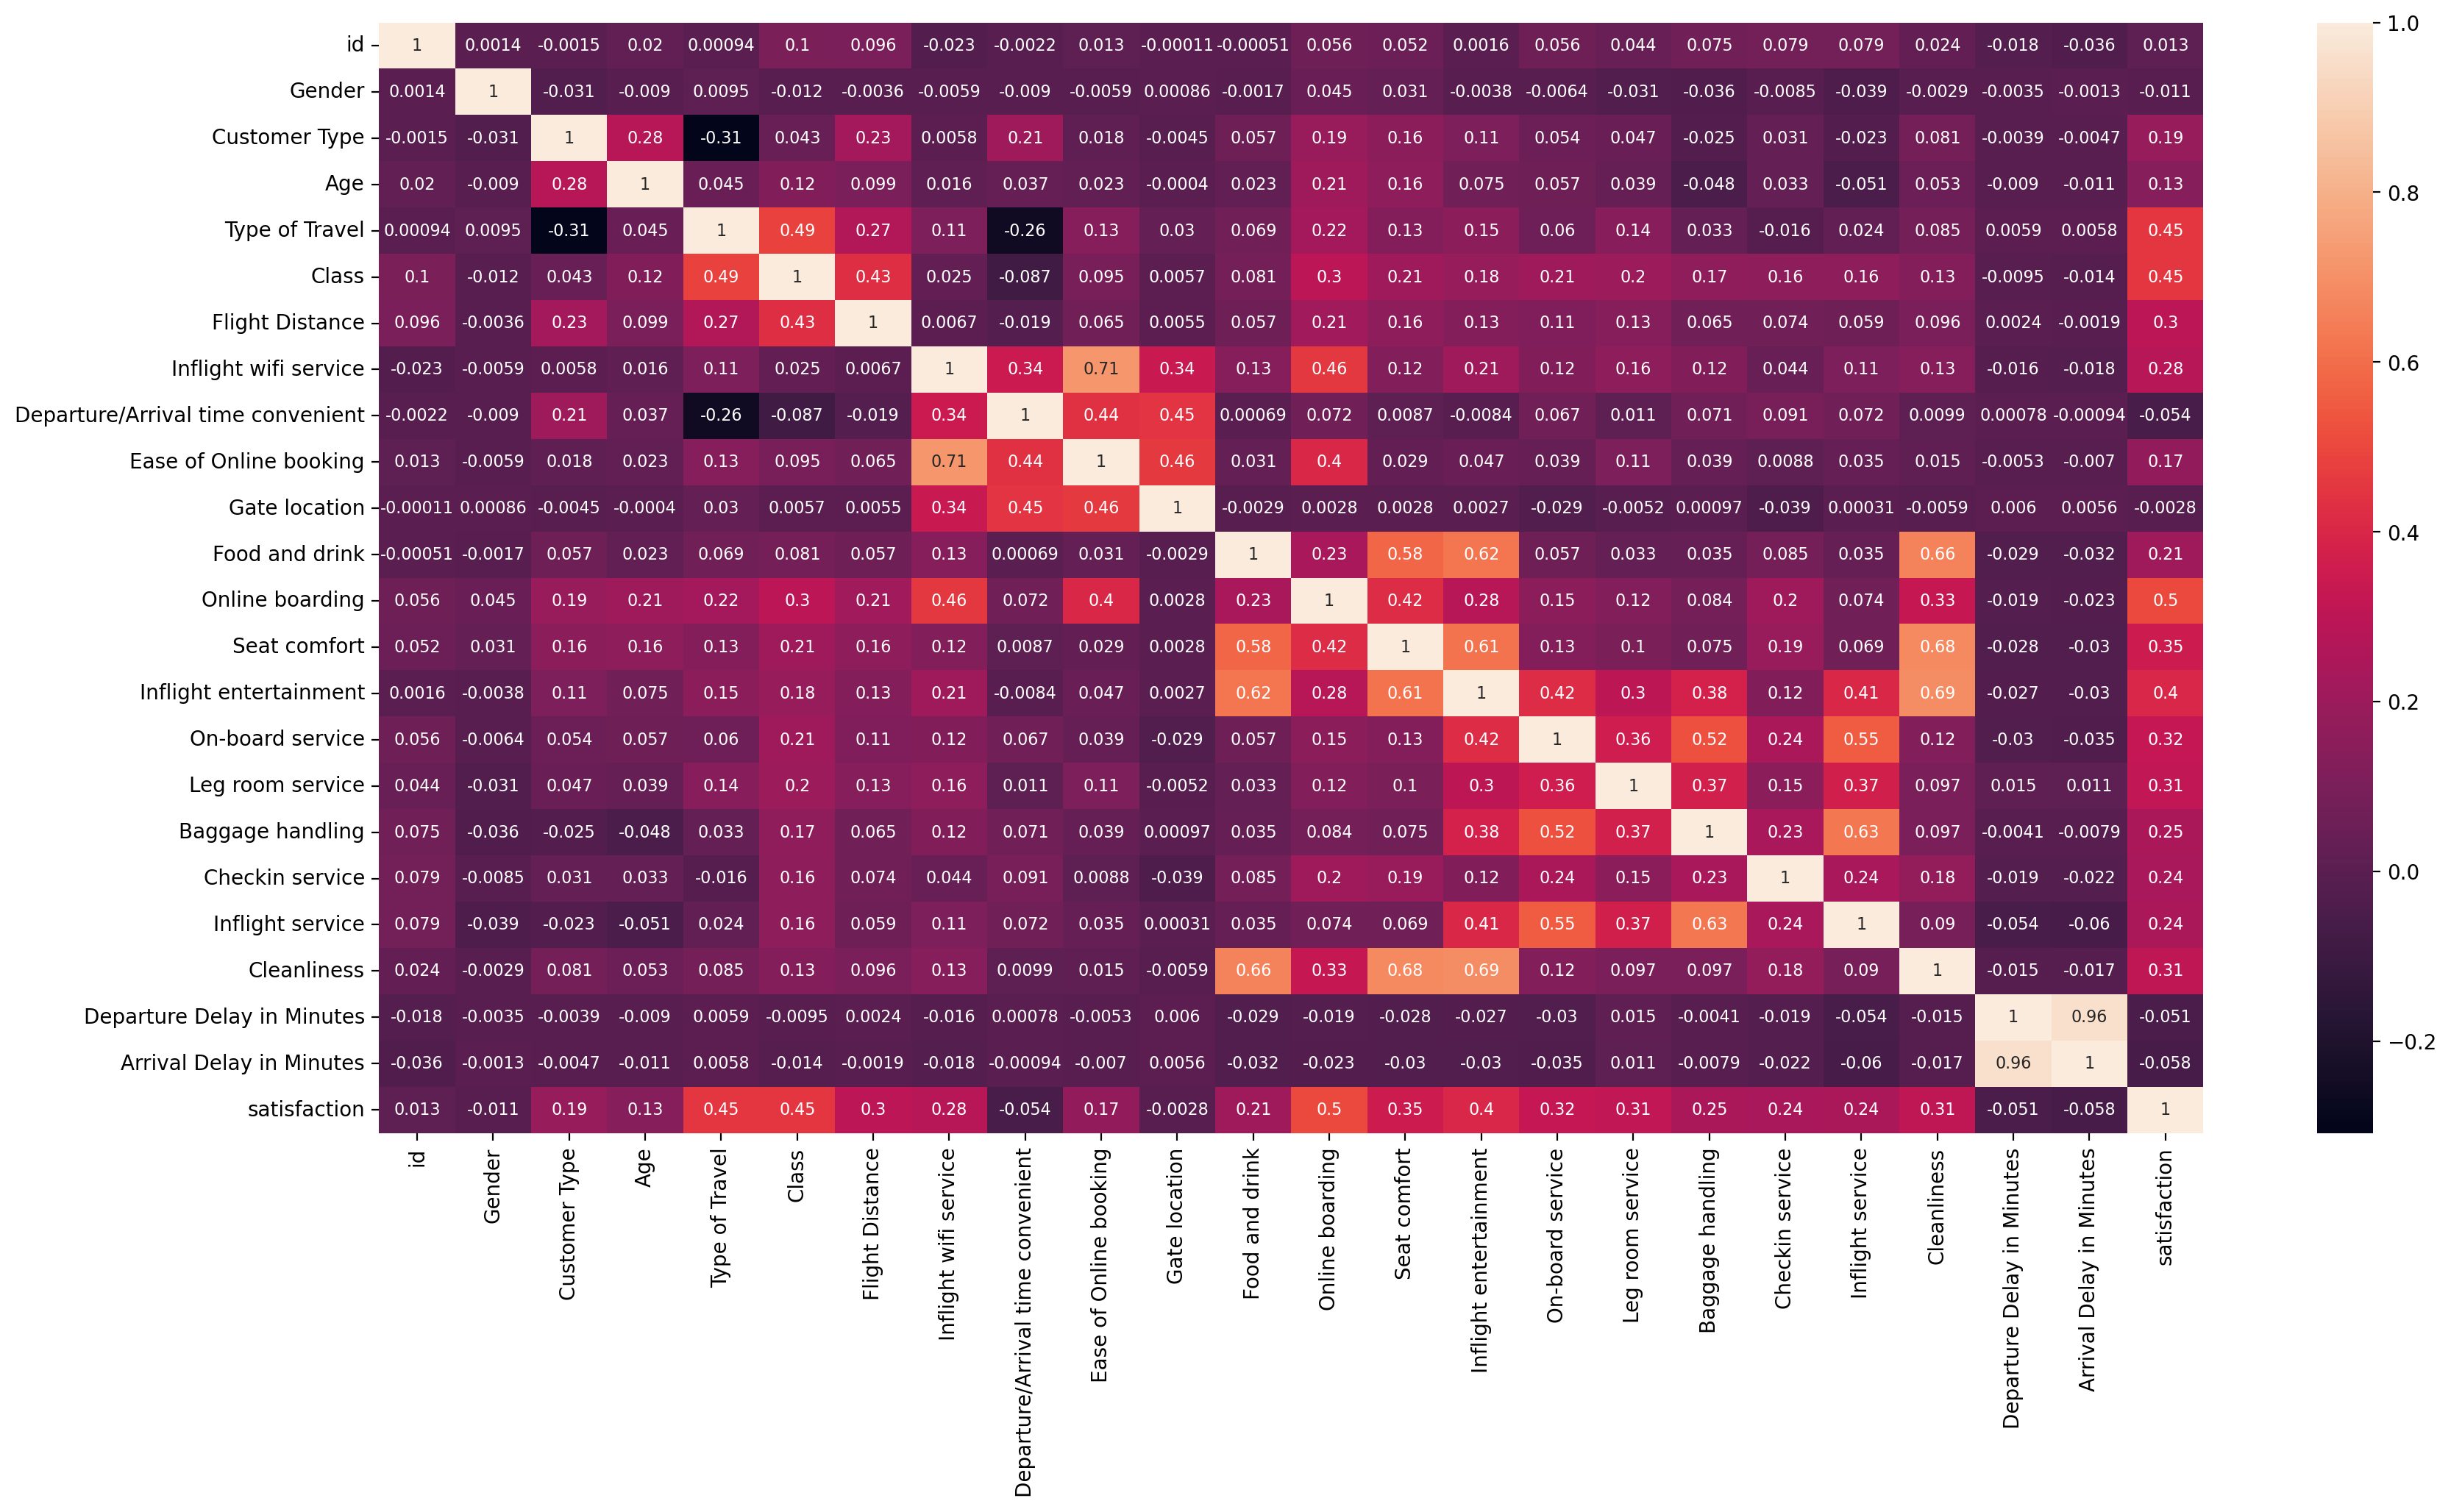

In [23]:
final_num = final_df.select_dtypes(include=['int64','float64' ])
correlation = final_num.corr()
plt.figure(figsize=(20,10),dpi=200)
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True, annot_kws={"size": 8})

# Outlier Detection
* Outlier detection is very important for the correct operation of the model when installing the model.

In [24]:
final_df.head()

id  Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0   70172       0              1   13               0      0              460   
1    5047       0              0   25               1      2              235   
2  110028       1              1   26               1      2             1142   
3   24026       1              1   25               1      2              562   
4  119299       0              1   61               1      2              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0                       3  ...                       5                 4   
1                       3  ...                       1                 1   
2                       2  ...                       5                 4   
3                       5  ...                       2                 2   
4                       3  ...                       3                 3   

   Leg room service  Baggage handling  Checkin service  Inflight service  \
0                 3                 4                4                 5   
1                 5                 3                1                 4   
2                 3                 4                4                 4   
3                 5                 3                1                 4   
4                 4                 4                3                 3   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0            5                          25                      18.0   
1            1                           1                       6.0   
2            5                           0                       0.0   
3            2                          11                       9.0   
4            3                           0                       0.0   

   satisfaction  
0             0  
1             0  
2             1  
3             0  
4             1  

[5 rows x 24 columns]

In [25]:
numerical_features = final_df.select_dtypes(exclude=['object']).copy()
numerical_features.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

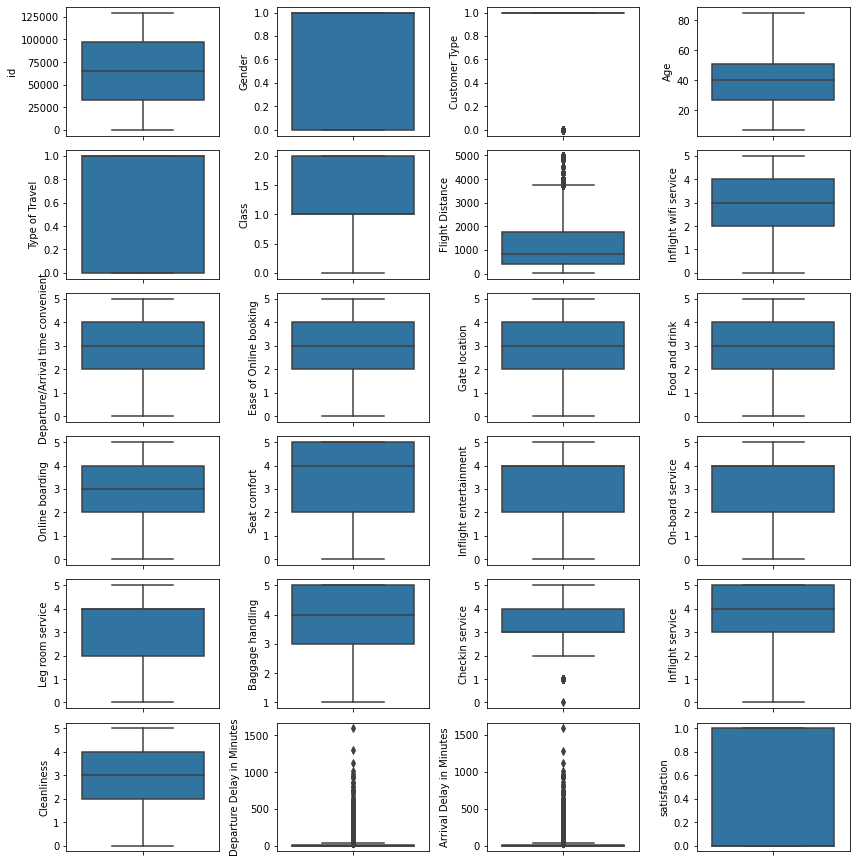

In [26]:
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])

plt.tight_layout()
plt.show()

* Below independent variables contain Outliers
* Customer Type
* Flight Distance
* Checkin service
* Arrival Delay in Minutes
* Departure Delay in Minutes

**Impute all outlers by use of Median()**

In [27]:
print(final_df['Customer Type'].quantile(0.50)) 
print(final_df['Customer Type'].quantile(0.95)) 
final_df['Customer Type'] = np.where(final_df['Customer Type'] > 1.0, 1.0, final_df['Customer Type'])

1.0
1.0


In [28]:
print(final_df['Flight Distance'].quantile(0.50)) 
print(final_df['Flight Distance'].quantile(0.95)) 
final_df['Flight Distance'] = np.where(final_df['Flight Distance'] > 844.0, 3380.0, final_df['Flight Distance'])


844.0
3380.0


In [29]:
print(final_df['Checkin service'].quantile(0.50)) 
print(final_df['Checkin service'].quantile(0.95)) 
final_df['Checkin service'] = np.where(final_df['Checkin service'] > 3.0, 5.0, final_df['Checkin service'])

3.0
5.0


In [30]:
print(final_df['Arrival Delay in Minutes'].quantile(0.50)) 
print(final_df['Arrival Delay in Minutes'].quantile(0.95)) 
final_df['Arrival Delay in Minutes'] = np.where(final_df['Arrival Delay in Minutes'] > 0.0, 78.0, final_df['Arrival Delay in Minutes'])

0.0
78.0


In [31]:
print(final_df['Departure Delay in Minutes'].quantile(0.50)) 
print(final_df['Departure Delay in Minutes'].quantile(0.95)) 
final_df['Departure Delay in Minutes'] = np.where(final_df['Departure Delay in Minutes'] > 0.0, 77.0, final_df['Departure Delay in Minutes'])


0.0
77.0


In [32]:
# Making a copy of cleaned data
final_df_ = final_df.copy()

## Drop ID

In [33]:
final_df.drop(labels=["id"],axis=1,inplace=True)

In [34]:
final_df.head()

Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0       0            1.0   13               0      0            460.0   
1       0            0.0   25               1      2            235.0   
2       1            1.0   26               1      2           3380.0   
3       1            1.0   25               1      2            562.0   
4       0            1.0   61               1      2            214.0   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                       3              1  ...                       5   
1                       3              3  ...                       1   
2                       2              2  ...                       5   
3                       5              5  ...                       2   
4                       3              3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4              5.0   
1                 1                 5                 3              1.0   
2                 4                 3                 4              5.0   
3                 2                 5                 3              1.0   
4                 3                 4                 4              3.0   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                        77.0   
1                 4            1                        77.0   
2                 4            5                         0.0   
3                 4            2                        77.0   
4                 3            3                         0.0   

   Arrival Delay in Minutes  satisfaction  
0                      78.0             0  
1                      78.0             0  
2                       0.0             1  
3                      78.0             0  
4                       0.0             1  

[5 rows x 23 columns]

* Divide the target variable and independent variable into two sepearete object  <br>
* Named as X(contains all Independent Varibale) and y(has Target Variable) <br>

In [35]:
#CHOSE THE COLUMN FOR PRED. MODEL
X = final_df.loc[:,['Online boarding','Inflight wifi service','Type of Travel','Inflight entertainment','Customer Type'
                 ,'Gender','Cleanliness','Inflight service','Seat comfort',
                 'Class','Baggage handling','Age','Checkin service','Food and drink','Ease of Online booking']]

In [36]:
X.head()

Online boarding  Inflight wifi service  Type of Travel  \
0                3                      3               0   
1                3                      3               1   
2                5                      2               1   
3                2                      2               1   
4                5                      3               1   

   Inflight entertainment  Customer Type  Gender  Cleanliness  \
0                       5            1.0       0            5   
1                       1            0.0       0            1   
2                       5            1.0       1            5   
3                       2            1.0       1            2   
4                       3            1.0       0            3   

   Inflight service  Seat comfort  Class  Baggage handling  Age  \
0                 5             5      0                 4   13   
1                 4             1      2                 3   25   
2                 4             5      2                 4   26   
3                 4             2      2                 3   25   
4                 3             5      2                 4   61   

   Checkin service  Food and drink  Ease of Online booking  
0              5.0               5                       3  
1              1.0               1                       3  
2              5.0               5                       2  
3              1.0               2                       5  
4              3.0               4                       3

In [37]:
y = final_df.loc[:,'satisfaction'] 

In [38]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: satisfaction, dtype: int64

# Sampling
* Divide the data into model training dataset and test dataset. <br>


In [39]:
import sklearn
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [41]:
print(x_train.shape)

print(y_train.shape)

(90916, 15)
(90916,)


In [42]:
print(sum(y_train==0))
print(sum(y_train==1))

51473
39443


# Model Building, testing and validation

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
LR = LogisticRegression()

In [45]:
LR.fit(x_train,y_train)

LogisticRegression()

In [46]:
predictions_LR = LR.predict(x_test)
predictions_LR

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
tab_LR = confusion_matrix(predictions_LR,y_test)
print(tab_LR)


[[19641  2825]
 [ 2338 14160]]


In [48]:
accuracy_LR= tab_LR.diagonal().sum() / tab_LR.sum()*100

print("Accuracy for Logistic Model is :",accuracy_LR)

Accuracy for Logistic Model is : 86.749307052664


In [49]:
TP_log = tab_LR[0, 0]
TN_log = tab_LR[1, 1]
FP_log = tab_LR[1,0]
FN_log = tab_LR[0, 1]

# Accuracy by calculation & built-in fuction
Overall_Accuracy_log = ((TP_log + TN_log) / float(TP_log + TN_log + FP_log + FN_log))
print('Overall Accuracy of Logistic Regression is:',Overall_Accuracy_log*100)

print('\n')
# Sensitivity or recall score or tpr
sensitivity_log = TP_log / float(FN_log + TP_log)
print('Sensitivity of Logistic Regression is:',sensitivity_log*100)

print('\n')
#Specificity
specificity_log = TN_log / (TN_log + FP_log)
print('Specificity of Logistic Regression is:',specificity_log*100)

print('\n')
#Precision
precision_log = TP_log / float(TP_log + FP_log)
print('precision value for Logistic Regression is:',precision_log*100)
print('\n')

#False_Positive_Rate
false_positive_rate_log = FP_log / float(TN_log + FP_log)
print('False Positive Ratio for Logistic Regression is:',false_positive_rate_log*100)


Overall Accuracy of Logistic Regression is: 86.749307052664


Sensitivity of Logistic Regression is: 87.42544289148046


Specificity of Logistic Regression is: 85.82858528306461


precision value for Logistic Regression is: 89.36257336548523


False Positive Ratio for Logistic Regression is: 14.171414716935384


 # DecisionTreeClassifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dte = DecisionTreeClassifier()

In [52]:
dte.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
predictions_dte = dte.predict(x_test)
predictions_dte

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
tab_dte = confusion_matrix(predictions_dte, y_test)
tab_dte

array([[20836,  1141],
       [ 1143, 15844]], dtype=int64)

In [55]:
print(classification_report(predictions_dte, y_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     21977
           1       0.93      0.93      0.93     16987

    accuracy                           0.94     38964
   macro avg       0.94      0.94      0.94     38964
weighted avg       0.94      0.94      0.94     38964



In [56]:
TP_dte = tab_dte[0, 0]
TN_dte = tab_dte[1, 1]
FP_dte = tab_dte[1,0]
FN_dte = tab_dte[0, 1]

# Accuracy by calculation & built-in fuction
accuracy_dte = ((TP_dte + TN_dte) / float(TP_dte + TN_dte + FP_dte + FN_dte))
print('Overall Accuracy of Decision Tree Classifier is :',accuracy_dte*100)

print('\n')
# Sensitivity or recall score or tpr
sensitivity_dte = TP_dte / float(FN_dte + TP_dte)
print('Sensitivity of Decision Tree Classifier is :',sensitivity_dte*100)

print('\n')
#Specificity
specificity_dte = TN_dte / (TN_dte + FP_dte)
print('Specificity of Decision Tree Classifier is :',specificity_dte*100)
print('\n')
#Precision
precision_dte = TP_dte / float(TP_dte + FP_dte)
print('precision value for Decision Tree Classifier is:',precision_dte*100)
print('\n')

#False_Positive_Rate
false_positive_rate_dte = FP_dte / float(TN_dte + FP_dte)
print('False Positive Ratio for Decision Tree Classifier:',false_positive_rate_dte*100)

Overall Accuracy of Decision Tree Classifier is : 94.13817883174212


Sensitivity of Decision Tree Classifier is : 94.80820858169905


Specificity of Decision Tree Classifier is : 93.27132513098252


precision value for Decision Tree Classifier is: 94.79958141862687


False Positive Ratio for Decision Tree Classifier: 6.7286748690174845


**Feature Importance**

In [57]:
feature_importance = pd.DataFrame({'Significant_features':dte.feature_importances_,'Columns_name':x_train.columns}).sort_values(['Significant_features'],ascending = False)
feature_importance

Significant_features            Columns_name
0               0.367048         Online boarding
1               0.180515   Inflight wifi service
2               0.151815          Type of Travel
3               0.048872  Inflight entertainment
11              0.045658                     Age
4               0.038511           Customer Type
10              0.028524        Baggage handling
7               0.025951        Inflight service
12              0.025553         Checkin service
8               0.022974            Seat comfort
9               0.021357                   Class
14              0.015179  Ease of Online booking
6               0.014162             Cleanliness
13              0.008589          Food and drink
5               0.005290                  Gender

# Adaptive Boosting

In [58]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier

AdaBoost = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=600)

In [59]:
AdaBoost.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=600)

In [60]:
predictions_abc = AdaBoost.predict(x_test)
predictions_abc

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
tab_abc = confusion_matrix(predictions_abc, y_test)
tab_abc

array([[21006,  1200],
       [  973, 15785]], dtype=int64)

In [62]:
accuracy_abp = tab_abc.diagonal().sum() / tab_abc.sum()*100
print('Accuracy for AdaBoost :',accuracy_abp)

Accuracy for AdaBoost : 94.42305718098758


In [63]:
TP_abc = tab_abc[0, 0]
TN_abc = tab_abc[1, 1]
FP_abc = tab_abc[1,0]
FN_abc = tab_abc[0, 1]

# Accuracy by calculation & built-in fuction
Overall_Accuracy_abc= ((TP_abc + TN_abc) / float(TP_abc + TN_abc + FP_abc + FN_abc))
print('Overall Accuracy of Adaptive Boosting is :',Overall_Accuracy_abc*100)
print('\n')
# Sensitivity or recall score or tpr
sensitivity_abc = TP_abc / float(FN_abc + TP_abc)
print('Sensitivity of Adaptive Boosting is :',sensitivity_abc*100)
print('\n')
#Specificity
specificity_abc = TN_abc / (TN_abc + FP_abc)
print('Specificity of Adaptive Boosting is :',specificity_abc*100)
print('\n')
#Precision
precision_abc = TP_abc / float(TP_abc + FP_abc)
print('precision value for Adaptive Boosting is:',precision_abc*100)
print('\n')

#False_Positive_Rate
false_positive_rate_abc = FP_abc / float(TN_abc + FP_abc)
print('False Positive Ratio Adaptive Boosting is:',false_positive_rate_abc*100)

Overall Accuracy of Adaptive Boosting is : 94.42305718098758


Sensitivity of Adaptive Boosting is : 94.59605512023778


Specificity of Adaptive Boosting is : 94.19381787802841


precision value for Adaptive Boosting is: 95.57304699940853


False Positive Ratio Adaptive Boosting is: 5.806182121971595


# Voting Classifier

In [64]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

In [65]:
dtreee = DecisionTreeClassifier()
rfcc = RandomForestClassifier()
logstic = LogisticRegression()
Boost = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=100)

In [66]:
#voting = hard coz i want only predictions on Numeric
vc = VotingClassifier(estimators=[ ('dtreee',dtreee),('rfcc',rfcc),('logstic',logstic),('Boost',Boost)],voting='hard')

In [67]:
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('dtreee', DecisionTreeClassifier()),
                             ('rfcc', RandomForestClassifier()),
                             ('logstic', LogisticRegression()),
                             ('Boost',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                                 n_estimators=100))])

In [68]:
Vooting_Classifier_Accuracy = accuracy_score(vc.predict(x_test),y_test)
Vooting_Classifier_Accuracy

0.9531362283133149

* Our model estimates 95.26% correctly. Our model works well.

**Comparison Between Models**

In [69]:
accuracies = ({"Logistic Regression":Overall_Accuracy_log*100,
               "Decision Tree Classifier":accuracy_dte*100,
               "Adaptive Boosting":Overall_Accuracy_abc*100})

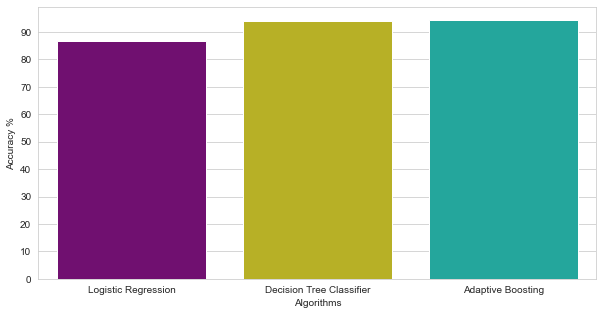

In [70]:
colors = ["purple", "#CFC60E","#0FBBAE"]
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

# AUROC CURVE

# Confusion Matrixes

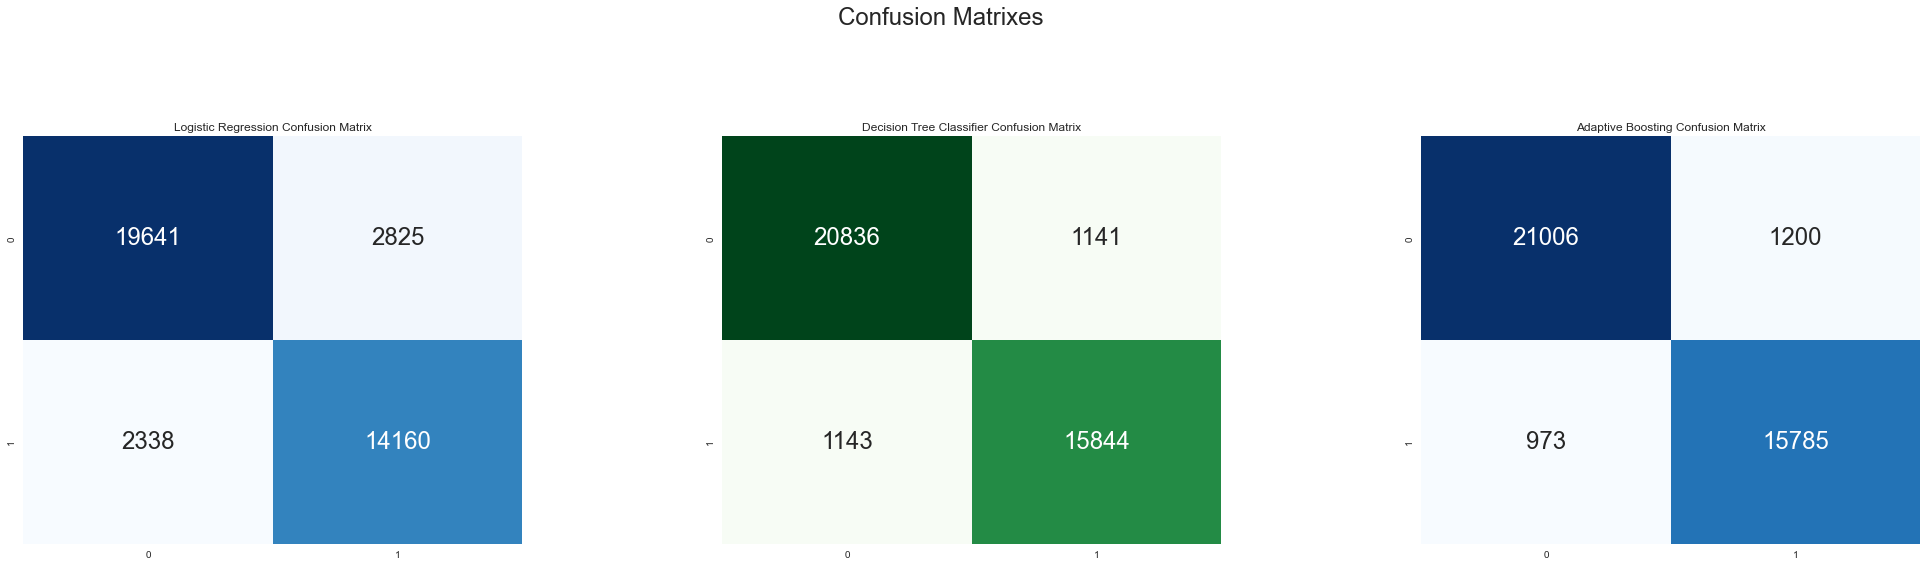

In [71]:
plt.figure(figsize=(34,18))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(tab_LR,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(tab_dte,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Adaptive Boosting Confusion Matrix")
sns.heatmap(tab_abc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.show()